# Introduction: The Vaccine Adverse Event Reporting System (VAERS) was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccines. This analysis will specifically focus on the COVID-19 vaccine and patients who reported symptoms post-vaccination. Link to the dataset = https://www.kaggle.com/ayushggarg/covid19-vaccine-adverse-reactions

# 1. Import common packages

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading in all the data

In [2]:
# Read in all csvs
vaers_data = pd.read_csv('VAERSDATA.csv', header=None, low_memory=False)
vaers_symptoms = pd.read_csv('VAERSSYMPTOMS.csv', header=None)
vaers_vax = pd.read_csv('VAERSVAX.csv', header=None)
birth_defect = pd.read_csv('BIRTH_DEFECT.csv', header=None)

# 3. Data Cleaning + Manipulation

In [3]:
# Clean up vaers_data
vaers_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,None,None,Pcn and bee venom
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,"""Dairy"""
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,None,None,None,Shellfish
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,Na,Na,NaN,Na


In [4]:
# Rename columns in the vaers data table to the appropriate labels
vaers_data = vaers_data.rename(columns = {0:'vaers_id',1:'state',2:'age_yrs',3:'sex',4:'died',5:'l_threat',6:'er_visit',7:'hospital',
                              8:'hospdays',9:'disable',10:'recovd',11:'vax_date',12:'onset_date',13:'numdays',14:'other_meds',
                              15:'cur_ill',16:'history',17:'allergies'})
# Dropping allergies, cur_ill, other_meds, er_visit, vax_date, onset_date, recovd, hospdays columns
vaers_data = vaers_data.drop(['allergies','cur_ill','other_meds','vax_date','onset_date','recovd','hospdays','er_visit'], axis=1)

In [5]:
# Converting 'died' column to boolean
vaers_data['died'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.died != 1, 'died'] = 0

In [6]:
vaers_data['died'].value_counts()

0.0    32164
1.0     1957
Name: died, dtype: int64

In [7]:
# Converting 'l_threat', 'hospital', and 'disable' columns to boolean
vaers_data['l_threat'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.l_threat != 1, 'l_threat'] = 0

vaers_data['hospital'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.hospital != 1, 'hospital'] = 0

vaers_data['disable'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.disable != 1, 'disable'] = 0

In [8]:
# Converting 'history' column to boolean based on set of possible input strings
no_hist = ['Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None',
           'Medical History/Concurrent Conditions: No adverse event (No reported medical history)',
          'None', 'none', 'N/A', 'n/a', 'N/a', '', 'no', 'None.', 'NONE', 'No', 'None Known', 'None reported on consent form',
          'NO KNOWN', 'None reported', 'Not applicable', np.NaN]
vaers_data.history.replace(no_hist, 0, regex=True, inplace=True)
vaers_data.loc[vaers_data.history != 0, 'history'] = 1

In [9]:
# Clean up vaers_symptoms
display(len(vaers_symptoms))
vaers_symptoms.head()

48110

,0,1,2,3,4,5
0,916600,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [10]:
# Replace numpy na with empty string
vaers_symptoms.replace(np.nan, '', inplace=True)

# Switch to a numpy array for now
vaers_symptoms = np.array(vaers_symptoms)

# We need to derive the total number of symptoms each patient experiences. Here we are making count list which counts
# total no. of symptoms for each row
count = []
for i in range(0,48110):
    x = 0
    for j in range(1,6):
        if vaers_symptoms[i,j] != '':
            x = x+1
    count.append(x)
len(count)

48110

In [11]:
# Reshape count into a vertical array
count = np.array(count)
count = np.reshape(count,(48110,1))
count = np.array(count)

In [12]:
# Appending count array to the symptoms array
vaers_symptoms = np.append(vaers_symptoms, count, axis = 1)
vaers_symptoms.shape

(48110, 7)

In [13]:
# Deleting string symptoms columns and only keeping the VAERS_ID and Symptom count
vaers_symptoms = np.delete(vaers_symptoms,[1,2,3,4,5],1)
vaers_symptoms.shape

(48110, 2)

In [14]:
# Converting the data in the array to int data type
vaers_symptoms = vaers_symptoms.astype(np.int)

# Creating a dictionary and removing multiple values of VAERS_ID
# and adding the symptom count of rows with same VAERS_ID
dict1 = {}
for i in vaers_symptoms:
    if i[0] not in dict1:
        dict1[i[0]] = i[1]
    else:
        dict1[i[0]] = dict1[i[0]] + i[1]
        
# Checking if the length reduced or not
print(len(dict1))

34121


In [15]:
# Override old DataFrame with newly created symptom count
new_symptoms = np.array(list(dict1.items()))
vaers_symptoms = pd.DataFrame(new_symptoms)

# Rename columns to represent new symptoms df
vaers_symptoms.rename(columns = {0: 'vaers_id', 1: 'symptom_count'}, inplace=True)

In [16]:
# Clean up the third csv, VAERSVAX
print(len(vaers_vax))
vaers_vax.head()

34174


,0,1,2
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH
3,916603,COVID19,MODERNA
4,916604,COVID19,MODERNA


In [17]:
# Rename columns in the vax table to appropriate labels
vaers_vax.rename(columns = {0: 'vaers_id', 1: 'vax_type', 2: 'vax_manu'}, inplace=True)

# Drop duplicate rows (ID dups)
vaers_vax = vaers_vax.drop_duplicates()
print(len(vaers_vax))

# Drop vax_type column since all rows are COVID19
vaers_vax.drop('vax_type', axis = 1, inplace=True)

33808


In [18]:
# Clean up the fourth csv, BIRTH_DEFECT
birth_defect.head()

,0,1
0,916600,NaN
1,916601,NaN
2,916602,NaN
3,916603,NaN
4,916604,NaN


In [19]:
# Rename columns to appropriate labels
birth_defect.rename(columns = {0:'vaers_id',1:'birth_defect'}, inplace=True)

In [20]:
# Convert ID column to an integer
birth_defect['vaers_id'] = birth_defect['vaers_id'].astype('int64')

# Replacing birth defect Y values with 1, all else with 0
birth_defect['birth_defect'] = birth_defect['birth_defect'].replace('Y', 1)
birth_defect.loc[birth_defect.birth_defect != 1, 'birth_defect'] = 0

# Check value counts
birth_defect['birth_defect'].value_counts(dropna=False)

0.0    34070
1.0       51
Name: birth_defect, dtype: int64

In [21]:
# data shape is 34121 by 10
print(vaers_data.shape)

# symptoms shape is now 34121 by 2
print(vaers_symptoms.shape)

# vax shape is 33808 by 2
print(vaers_vax.shape)

# birth defect is 34121 by 2
print(birth_defect.shape)

# difference between 34121 and 33808 should be removed as it is incomplete data

(34121, 10)
(34121, 2)
(33808, 2)
(34121, 2)


In [22]:
# Convert all vaers_id columns to int
vaers_data['vaers_id'] = vaers_data['vaers_id'].astype('int64')
vaers_symptoms['vaers_id'] = vaers_symptoms['vaers_id'].astype('int64')
vaers_vax['vaers_id'] = vaers_vax['vaers_id'].astype('int64')

## Merge the four DataFrames into one

In [23]:
# Merge the four tables into one combined df
covid_df = vaers_data.merge(birth_defect.merge(vaers_vax.merge(vaers_symptoms, on='vaers_id'), on='vaers_id'), on='vaers_id')
pd.set_option('display.max_columns', None)
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count
0,916600,TX,33.0,F,0.0,0.0,0.0,0.0,2.0,0,0.0,MODERNA,2
1,916601,CA,73.0,F,0.0,0.0,0.0,0.0,0.0,1,0.0,MODERNA,2
2,916602,WA,23.0,F,0.0,0.0,0.0,0.0,0.0,0,0.0,PFIZER\BIONTECH,4
3,916603,WA,58.0,F,0.0,0.0,0.0,0.0,0.0,1,0.0,MODERNA,3
4,916604,TX,47.0,F,0.0,0.0,0.0,0.0,7.0,0,0.0,MODERNA,4


In [24]:
covid_df.shape
# 33808 rows 13 columns, checks out

(33808, 13)

In [25]:
# Replace empty values with a numpy NaN value for age, then convert to a float type 
covid_df['age_yrs'] = covid_df['age_yrs'].replace(r'^\s*$', np.nan, regex=True)
covid_df['age_yrs'] = covid_df['age_yrs'].astype('float')
covid_df['age_yrs'] = round(covid_df['age_yrs'],0)

In [26]:
covid_df['sex'].value_counts()

F    24325
M     8649
U      834
Name: sex, dtype: int64

In [27]:
covid_df['vaers_id'].nunique()

33797

## Dropping duplicate rows

In [28]:
# How many duplicated rows do we have?
print(sum(covid_df['vaers_id'].duplicated()))

# Drop 11 duplicate rows from covid_df
covid_df = covid_df.drop_duplicates(subset=['vaers_id'])

11


In [29]:
# Replacing empty values in numdays with np.nan
covid_df['numdays'] = covid_df['numdays'].replace('', np.nan)

### For this analysis, the columns life threatening, hospitalized, disable, birth defect, and died will all be categorized as a severe side effect based on a World Health Organization (WHO) definition of adverse event.

In [30]:
# Converting "severity" columns to int type
covid_df['l_threat'] = covid_df['l_threat'].astype('int64')
covid_df['died'] = covid_df['died'].astype('int64')
covid_df['hospital'] = covid_df['hospital'].astype('int64')
covid_df['disable'] = covid_df['disable'].astype('int64')
covid_df['birth_defect'] = covid_df['birth_defect'].astype('int64')
covid_df[['l_threat','died','hospital','disable','birth_defect']].dtypes

l_threat        int64
died            int64
hospital        int64
disable         int64
birth_defect    int64
dtype: object

In [31]:
# Adding new column 'count' which counts the no. of severity criteria - l_threat, died, hospital, disable, birth_defect
covid_df["Count"] = covid_df[['l_threat','died','hospital','disable','birth_defect']].sum(axis=1)

In [32]:
covid_df['Count'].value_counts()

0    27002
1     5431
2     1219
3      141
4        4
Name: Count, dtype: int64

### If a patient is experiencing any 1 of the 5 criteria for an adverse event, that patient will be flagged as having "Severe side-effects". If not, a "No Severity" tag will be given.

In [33]:
# Create a new list based on the no. of count. If count = 0, then Severity = 0. else Severity = 1.
Sever = []
for i in covid_df['Count']:
    if i == 0:
        Sever.append(0)
    else:
        Sever.append(1)

In [34]:
# Adding Sever list to dataframe as a new column - severity
covid_df['severity'] = Sever

In [35]:
covid_df['severity'].value_counts()

0    27002
1     6795
Name: severity, dtype: int64

In [36]:
pd.options.mode.chained_assignment = None  # default='warn'

In [37]:
# Change unknown or 'U' sex values to Na.
covid_df['sex'] = covid_df['sex'].replace('U', np.nan ,regex=True)

# Remove Na value rows from sex, age and numdays columns and assign to covid_df2.
covid_df2 = covid_df.dropna(subset = ['age_yrs', 'sex', 'numdays'])

# Cast numdays as int type
covid_df2['numdays'] = covid_df2['numdays'].astype('int64')

# Check how many rows of data there are now
print(covid_df2['vaers_id'].nunique())

29561


### Dropping all instances where numdays is > 45 or symptom count is > 25.

In [38]:
# Drop all rows of data where numdays > 45. Based on timeline from when
# vaccines were released and dataset was published
covid_df2.drop(covid_df2[covid_df2['numdays'] > 45].index, inplace=True)

In [39]:
# Drop all rows of data where symptom count > 25.
covid_df2.drop(covid_df2[covid_df2['symptom_count'] > 25].index, inplace=True)

In [40]:
# Replace 'unknown manufacturer' with NaN.
covid_df2['vax_manu'] = covid_df['vax_manu'].replace('UNKNOWN MANUFACTURER', np.nan, regex=True)

# Remove Na value rows from vax manufacturer column and overwrite covid_df2.
covid_df2 = covid_df2.dropna(subset = ['vax_manu'])

# Check how many rows of data now
print(covid_df2['vaers_id'].nunique())

29273


In [41]:
covid_df2['history'].value_counts(dropna=False)
# Medical history is a boolean value with 0 representing no prior med hisory and 1 representing any sort of med history
# 12,279 with a 1.  16,994 with a 0.

0    16994
1    12279
Name: history, dtype: int64

In [42]:
covid_df2 = covid_df2.reset_index()

In [43]:
# Assigning sex column a number and creating the new list by sex_num
# Male is assigned to 0, female assigned to 1
sex_num = []
for i in range(0,29273):
    if covid_df2['sex'][i] == 'M':
        sex_num.append(0)
    else:
        sex_num.append(1)

In [44]:
# Creating new column by name of sex_num and using the newly created list sex_num
covid_df2['sex_num'] = sex_num

In [45]:
# Assigning vax_manu a number and creating the new list by vaxmanu
# Moderna assigned to 0, Pfizer assigned to 1, J&J assigned to 2
vaxmanu = []
for i in range(0,29273):
    if covid_df2['vax_manu'][i] == 'MODERNA':
        vaxmanu.append(0)
    elif covid_df2['vax_manu'][i] == 'PFIZER\BIONTECH':
        vaxmanu.append(1)
    elif covid_df2['vax_manu'][i] == 'JANSSEN':
        vaxmanu.append(2)

In [46]:
# Adding the new column vax_manu_num taking values from newly created list - vaxmanu.
covid_df2['vax_manu_num'] = vaxmanu

In [47]:
covid_df2['vax_manu_num'].value_counts()
# Moderna ~ 15k, Pfizer ~ 13k, JJ ~ 1k

0    15092
1    13091
2     1090
Name: vax_manu_num, dtype: int64

In [48]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,sex_num,vax_manu_num
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,1,0
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,1,0
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,1,1
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,1,0
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,1,0


## Export a DataFrame with State and Symptom count. This will be used to create a visual in Tableau of average symptom count per state.

In [49]:
# Fix up issues with State of CA and change empty values to U
covid_df2['state'] = covid_df2['state'].replace('Ca','CA',regex=True)
covid_df2['state'] = covid_df2['state'].replace(r'^\s*$','U',regex=True)

In [50]:
# Create a df of just State and Symptom Count, export as csv to use in Tableau for heatmap (average symptom count by state)
state_symptoms = covid_df2[['state','symptom_count']]
state_symptoms.to_csv('state_symptoms',header = ['State','Symptom Count'], index=False)

# 5. Data Visualization + Descriptives

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1640407984163' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='VAERS-AvgSymptomCountHeatmap&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640407984163');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

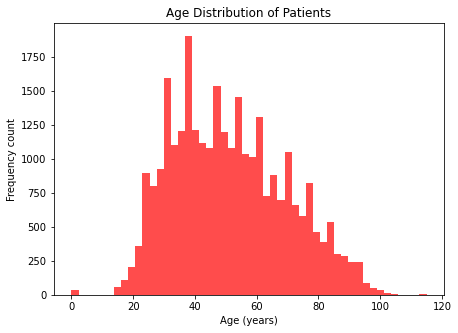

In [51]:
# Age distribution visual
plt.figure(figsize=(7,5))
plt.hist(covid_df2['age_yrs'],color="red",bins = 50, alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency count') 
plt.show()

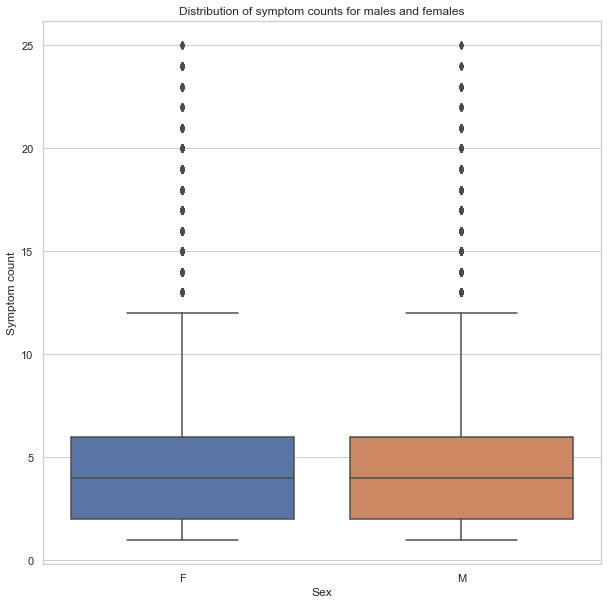

In [52]:
# Gender vs. Symptom count boxplot 
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
sns.boxplot(x='sex', y='symptom_count', data=covid_df2)
plt.title('Distribution of symptom counts for males and females')
plt.xlabel('Sex')
plt.ylabel('Symptom count')
plt.show()

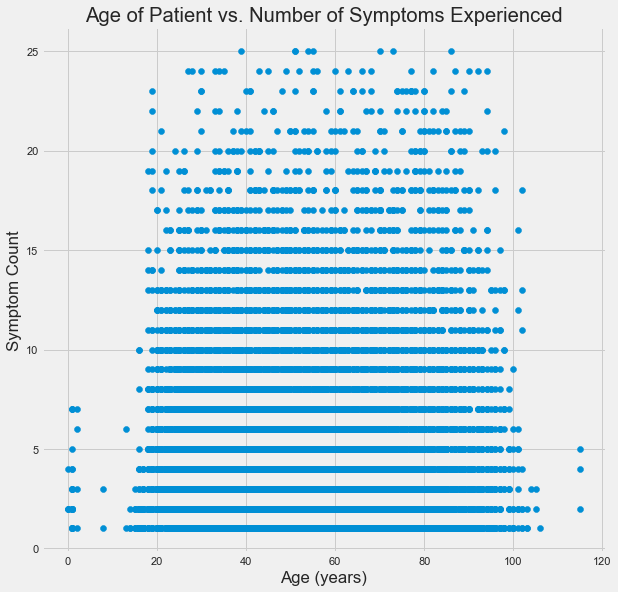

In [53]:
# Scatter plot visual of age vs. symptom count
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))
plt.scatter(x=covid_df2['age_yrs'], y=covid_df2['symptom_count'])
plt.xlabel('Age (years)')
plt.ylabel('Symptom Count')
plt.title('Age of Patient vs. Number of Symptoms Experienced')
plt.show()

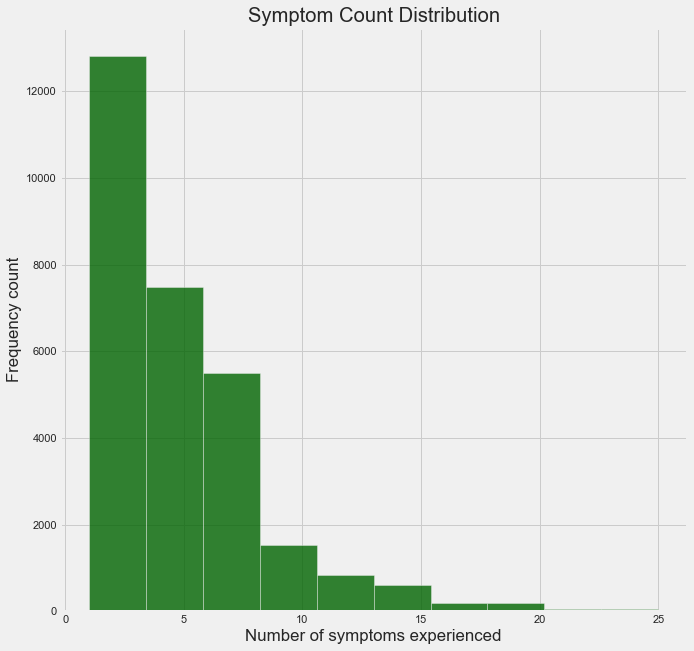

In [54]:
# Distribution of symptom count in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['symptom_count'], color='darkgreen', alpha=0.8)
plt.xlabel('Number of symptoms experienced')
plt.ylabel('Frequency count')
plt.title('Symptom Count Distribution')
plt.show()

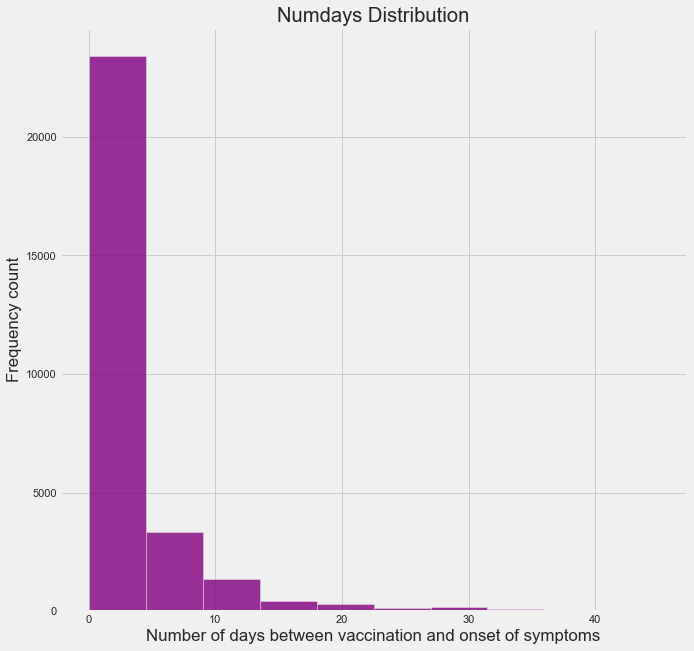

In [55]:
# Distribution of 'numdays' in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['numdays'], color='purple', alpha=0.8)
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Frequency count')
plt.title('Numdays Distribution')
plt.show()

In [56]:
# Let's take a look at our continuous variables using .describe()
covid_df2[['age_yrs','numdays','symptom_count']].describe()

,age_yrs,numdays,symptom_count
count,29273.000000,29273.000000,29273.000000
mean,51.188536,2.700372,4.732621
std,18.368814,5.093808,3.463876
min,0.000000,0.000000,1.000000
25%,37.000000,0.000000,2.000000
50%,49.000000,1.000000,4.000000
75%,65.000000,3.000000,6.000000
max,115.000000,45.000000,25.000000


### Here we see average age of 51 which makes sense since a good portion of the older population got vaccinated when vaccines were first released. Patients in this dataset experienced an average of 4.7 symptoms from the vaccine reaction and an average of 2.7 days between vaccination and onset.

# 6. Classification Modeling

### Research Question: How well can we classify whether a patient will experience severe side-effects or not based on the factors of age, gender, vaccine manufacturer, and medical history?
### Let's identify the feature and target variables for modeling

In [57]:
# Creating array of Severity column
severity = np.array(covid_df2['severity'])

In [58]:
# Names of severity variables
severity_Names = ['No Severity','Severe Side-effects']

In [59]:
# Creating a new column by name of severity_type to identify the type of severity
covid_df2['severity_type'] = np.array([severity_Names[i] for i in severity])

In [60]:
covid_df2['severity_type'].value_counts()
# 23329 instances of no severity, 5944 cases of severe side-effects

No Severity            23329
Severe Side-effects     5944
Name: severity_type, dtype: int64

### About a 4:1 class ratio

In [61]:
# Creating a new dataframe using the columns required and the target variable (severity_type)
covid_df_target = covid_df2[['age_yrs','sex_num','vax_manu_num','history','severity_type']]

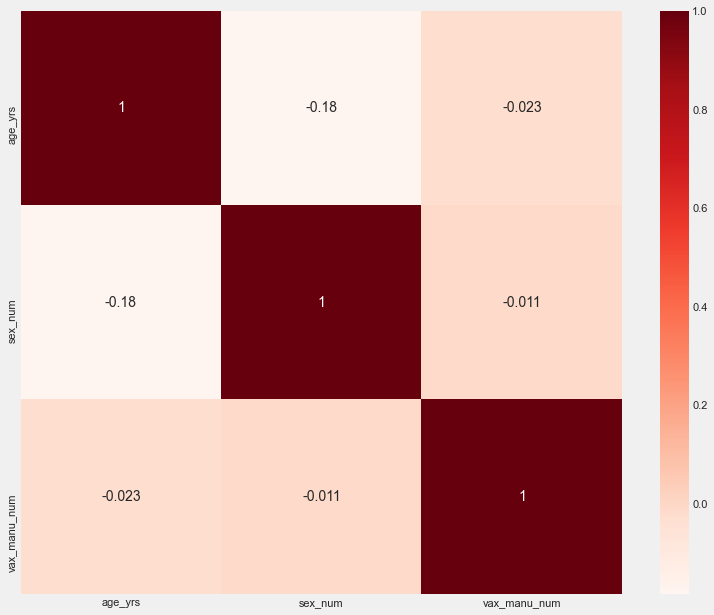

In [62]:
# Using Pearson Correlation to find out correlation between the input variables
plt.figure(figsize=(12,10))
cor = covid_df_target.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### No strong correlations present between variables.

In [63]:
covid_df_target.head()

,age_yrs,sex_num,vax_manu_num,history,severity_type
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


C:\Users\cowbo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


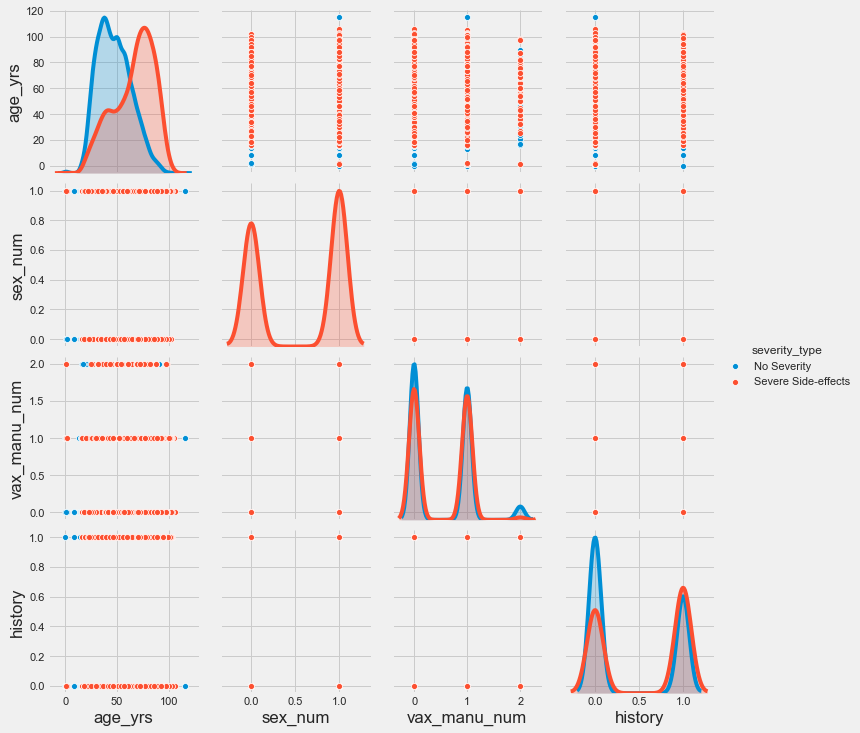

In [64]:
# Pairplot of the variables
sns.pairplot(covid_df_target, hue='severity_type')
plt.show()

### The difference in distributions for age between the two classes is interesting. A T-test could be performed later on to see if that difference is significant. 

In [65]:
# Generating the test and train sets using train_test_split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(covid_df_target[['age_yrs','sex_num','vax_manu_num','history']], covid_df_target[['severity_type']] , test_size=0.2, stratify=severity, random_state=123456)


In [66]:
# Random Forest classification for two classes
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)
rf.fit(X_train1, y_train1.values.ravel())

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

In [67]:
# Accuracy of Random Forest model
from sklearn.metrics import accuracy_score

predicted1 = rf.predict(X_test1)
accuracy1 = accuracy_score(y_test1, predicted1)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy1:.3}')

Out-of-bag score estimate: 0.833
Mean accuracy score: 0.836


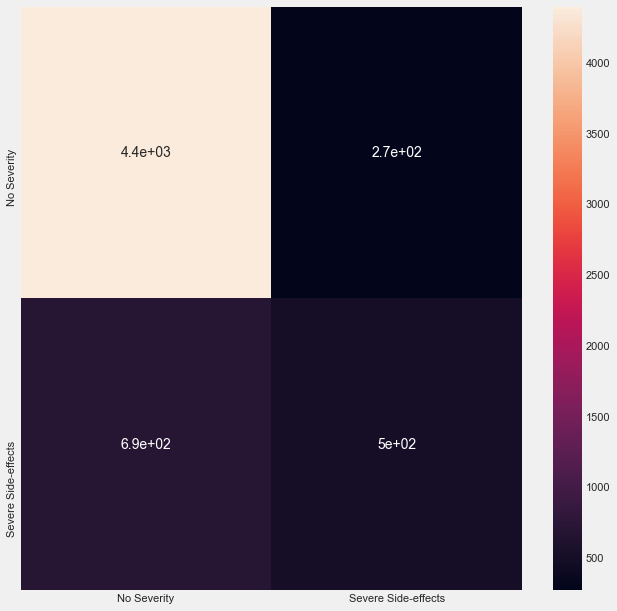

In [68]:
# Heatmap of Random Forest
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test1, predicted1), columns=severity_Names, index=severity_Names)
sns.heatmap(cm, annot=True)
plt.show()

In [69]:
# Predicting a particular value [age 84, female, pfizer, medical history yes]
rf.predict([[84,1,0,1]])

array(['Severe Side-effects'], dtype=object)

In [70]:
# Metrics classification report for Random Forest
from sklearn.metrics import classification_report

print(classification_report(y_test1, predicted1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.94      0.90      4666
Severe Side-effects       0.65      0.42      0.51      1189

           accuracy                           0.84      5855
          macro avg       0.76      0.68      0.70      5855
       weighted avg       0.82      0.84      0.82      5855



### While the accuracy score seems to be decent, the classification report tells us a different story. We are able to classify the "No Severity" group well but the model doesn't perform well for the "Severe side-effects" group.

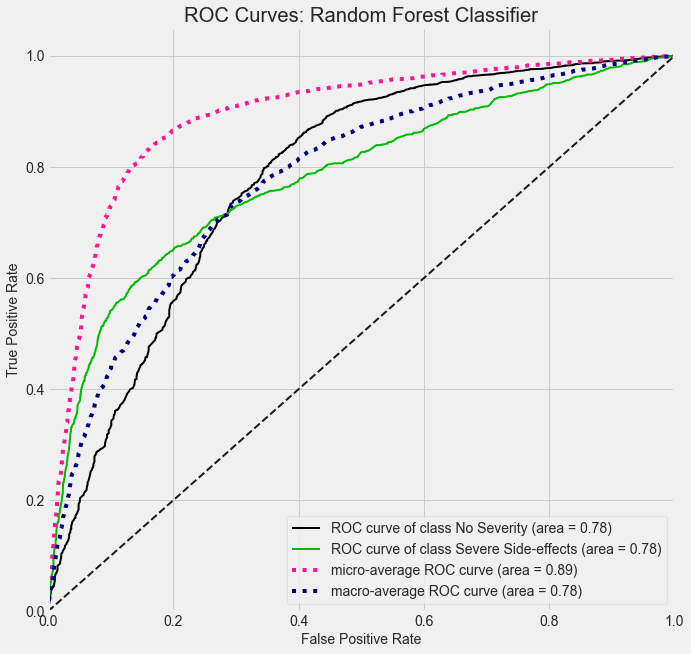

In [71]:
# ROC curve for Random Forest classification
import scikitplot as skplt

plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = rf.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Random Forest Classifier')
plt.show()

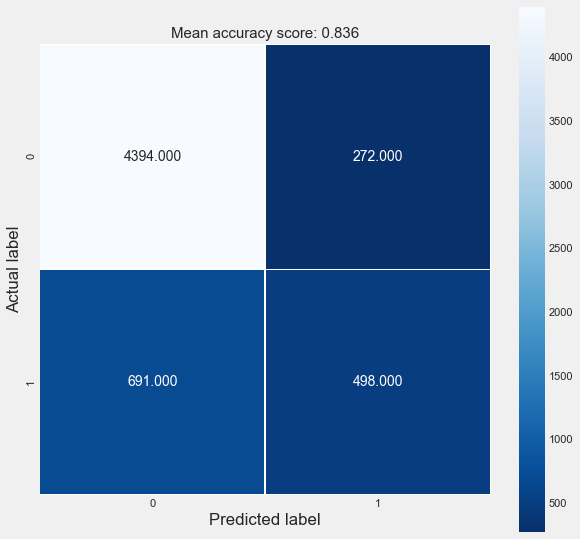

In [72]:
# Heat map for predicted and actual values of test set for Random Forest classification
from sklearn import metrics

cm = metrics.confusion_matrix(y_test1, predicted1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy1:.3}'
plt.title(all_sample_title, size = 15);

### Again we see the downfalls of this RF model. Less than half of the "Severe side-effects" group in the test set is being predicted accurately. 

In [73]:
# Now using logistic regression for the same 2-class classification
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train1, y_train1.values.ravel())
predictions1 = logreg.predict(X_test1)
score = logreg.score(X_test1, y_test1)
print(score)

0.8379163108454313


In [74]:
# Classification report for logistic regression

print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.85      0.96      0.90      4666
Severe Side-effects       0.70      0.36      0.47      1189

           accuracy                           0.84      5855
          macro avg       0.78      0.66      0.69      5855
       weighted avg       0.82      0.84      0.82      5855



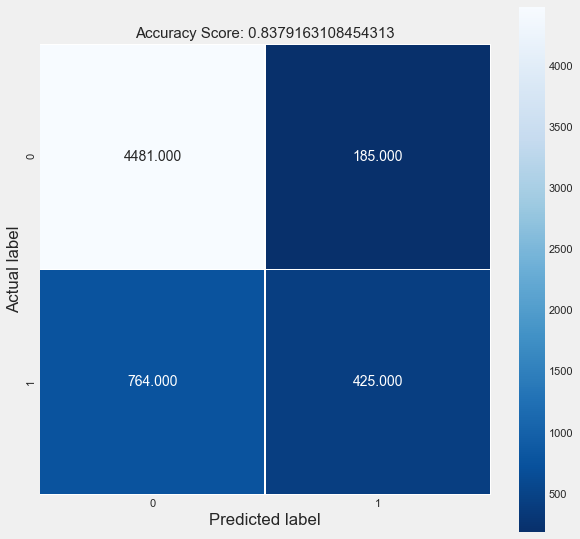

In [75]:
# Heat map for actual and predicted values for logistic regression

cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### We see the logistic regression is experiencing the same struggles. "No severity" getting classified correctly while "Severe side-effects" gets misclassified. Ultimately, we'd like to be more cautious in our predictions since having severe side effects is much more costly to an individual than not.

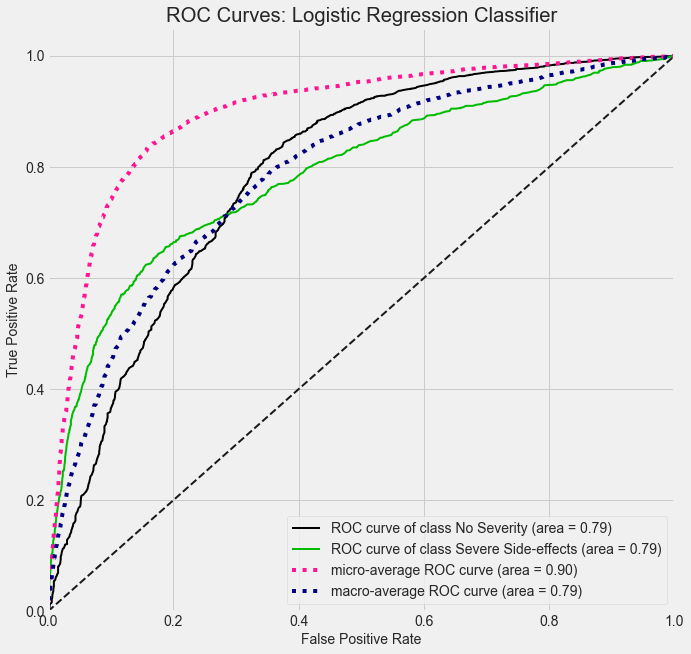

In [76]:
# ROC curve for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = logreg.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Logistic Regression Classifier')
plt.show()

In [77]:
# Using gradient boosting classifier to predict two classes
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train1, y_train1.values.ravel())
predictions1 = clf.predict(X_test1)
score = clf.score(X_test1, y_test1)
print(score)

0.8394534585824082


In [78]:
# Classification report for gradient boosting classifier
print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.95      0.90      4666
Severe Side-effects       0.68      0.40      0.51      1189

           accuracy                           0.84      5855
          macro avg       0.77      0.68      0.70      5855
       weighted avg       0.82      0.84      0.82      5855



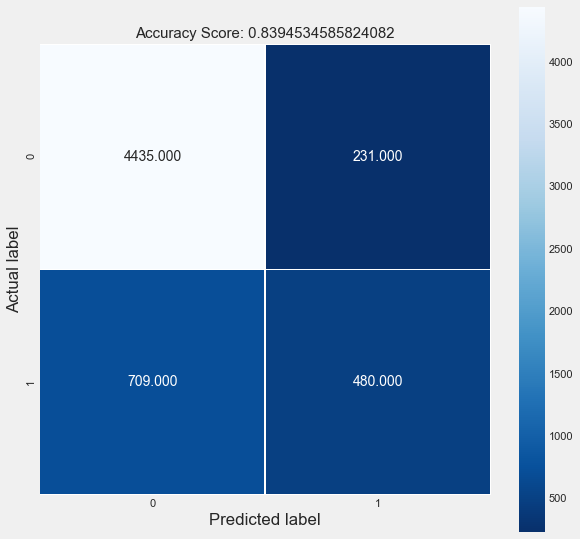

In [79]:
# Heat map for actual and predicted values for Gradient Boosting classification

cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### GB model is also struggling to classify the "Severe side-effects" group correctly. We will address one way to improve on this a little bit later.

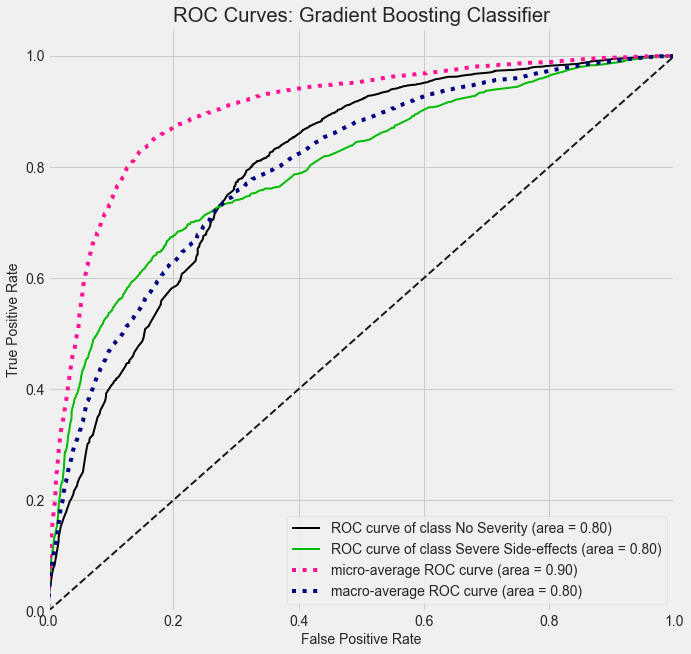

In [80]:
# ROC curve for Gradient Boosting classifier

plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = clf.predict_proba(X_test1)

skplt.metrics.plot_roc(y_test1, predicted_probas1)
plt.title('ROC Curves: Gradient Boosting Classifier')
plt.show()

In [81]:
# Predicting a case using Gradient Boost classifier [age 90, female, moderna, medical history yes]
clf.predict([[90,1,1,1]])

array(['Severe Side-effects'], dtype=object)

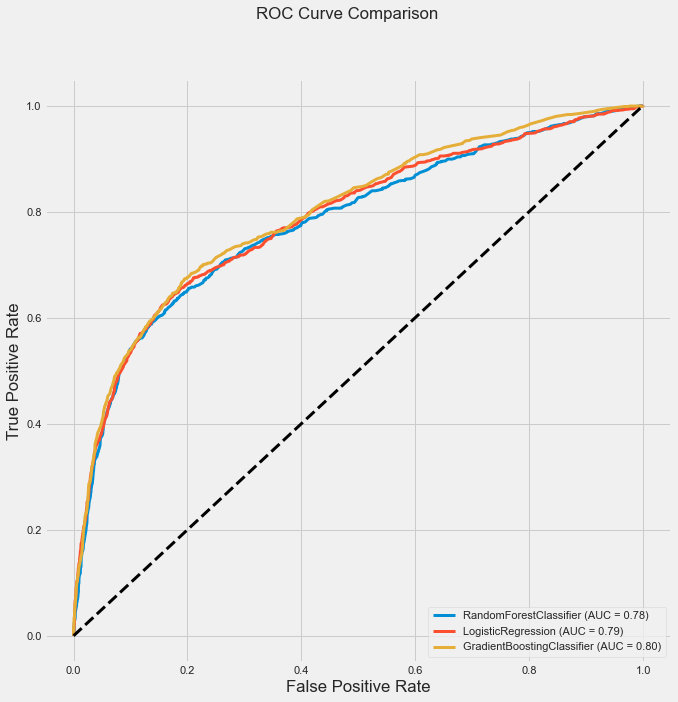

In [82]:
# Comparision of ROC curves from all 3 (RF, Logistic, GB) models
from sklearn.metrics import plot_roc_curve

fig = plot_roc_curve( rf, X_test1, y_test1, lw=3)
fig = plot_roc_curve( logreg, X_test1, y_test1, ax = fig.ax_, lw=3)
fig = plot_roc_curve( clf, X_test1, y_test1, ax = fig.ax_, lw=3)
fig.figure_.suptitle("ROC Curve Comparison")
plt.plot([0,1],[0,1], '--', color='black', lw=3)
plt.show() 

## Now to avoid the errors due to the high count of 'No Severity' data, we will equalize both the target and input variables and remodel the data using random forest, logistic, and gradient boosting classifiers

In [83]:
# Creating new dataframe - covid_no_sev which only has rows which have severity_type as No Severity
covid_no_sev = covid_df2[covid_df2['severity_type'] == 'No Severity']

In [84]:
# Selecting random 5944 rows from covid_no_sev data frame. (As severity row count is 5944 from earlier)
covid_no_sev = covid_no_sev.sample(n=5944)

In [85]:
# Creating new dataframe - covid_sev which only has rows which have severity_type as Severe Side-effects
covid_sev = covid_df2[covid_df2['severity_type'] == 'Severe Side-effects']

In [86]:
# Appending rows of covid_sev to covid_no_sev and creating a new dataframe - 'covid_df3'
covid_df3 = covid_no_sev.append(covid_sev)

In [87]:
covid_df3['severity_type'].value_counts()

No Severity            5944
Severe Side-effects    5944
Name: severity_type, dtype: int64

### We've now equalized the two classes. This should help reduce class bias and improve our models.

In [88]:
# Resetting the index
covid_df3 = covid_df3.reset_index()

In [89]:
# Selecting the new target dataframe with input and target variable
covid_df_target2 = covid_df3[['age_yrs','sex_num','vax_manu_num','history','severity_type']]

In [90]:
covid_df_target2.head()

,age_yrs,sex_num,vax_manu_num,history,severity_type
0,32.0,0,0,0,No Severity
1,37.0,1,0,1,No Severity
2,49.0,1,1,1,No Severity
3,64.0,1,1,1,No Severity
4,37.0,1,1,0,No Severity


In [91]:
# Creating array of Severity collumn
severity_new = np.array(covid_df3['severity'])

In [92]:
# Generating the test and train sets again for balanced classes

X_train2, X_test2, y_train2, y_test2 = train_test_split(covid_df_target2[['age_yrs','sex_num','vax_manu_num','history']], covid_df_target2[['severity_type']] , test_size=0.5, stratify=severity_new, random_state=123456)

In [93]:
# Random Forest classification for balanced classes

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)
rf.fit(X_train2, y_train2.values.ravel())

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

In [94]:
# Accuracy of balanced RF model
predicted2 = rf.predict(X_test2)
accuracy2 = accuracy_score(y_test2, predicted2)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy2:.3}')

Out-of-bag score estimate: 0.72
Mean accuracy score: 0.726


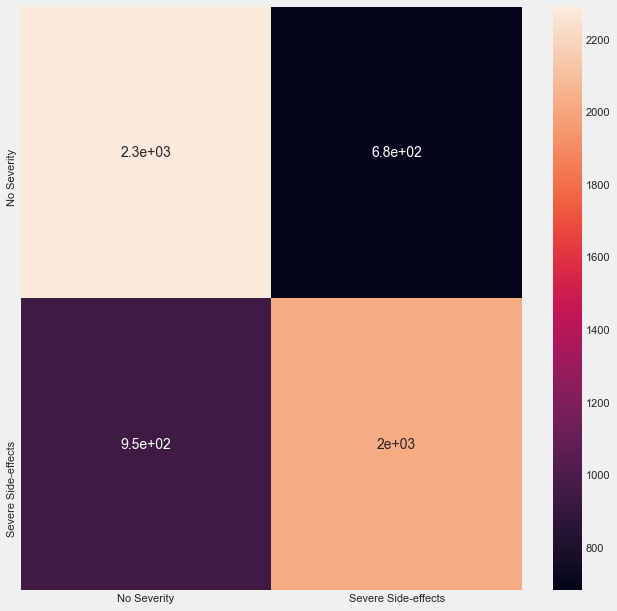

In [95]:
# Heatmap of balanced RF model

cm = pd.DataFrame(confusion_matrix(y_test2, predicted2), columns=severity_Names, index=severity_Names)
sns.heatmap(cm, annot=True)
plt.show()

In [96]:
# Classification report for balanced RF model
print(metrics.classification_report(y_test2, predicted2))
# Better scores for the severe side-effects class

                     precision    recall  f1-score   support

        No Severity       0.71      0.77      0.74      2972
Severe Side-effects       0.75      0.68      0.71      2972

           accuracy                           0.73      5944
          macro avg       0.73      0.73      0.73      5944
       weighted avg       0.73      0.73      0.73      5944



### While overall accuracy has decreased a bit, the model is much more balanced in its mistakes.

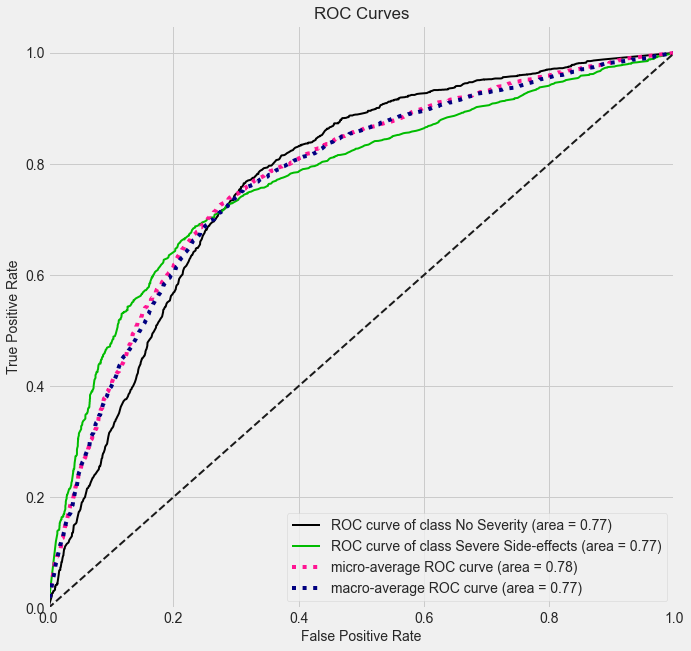

In [97]:
# ROC curve for the balanced RF model
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas21 = rf.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas21)
plt.show()

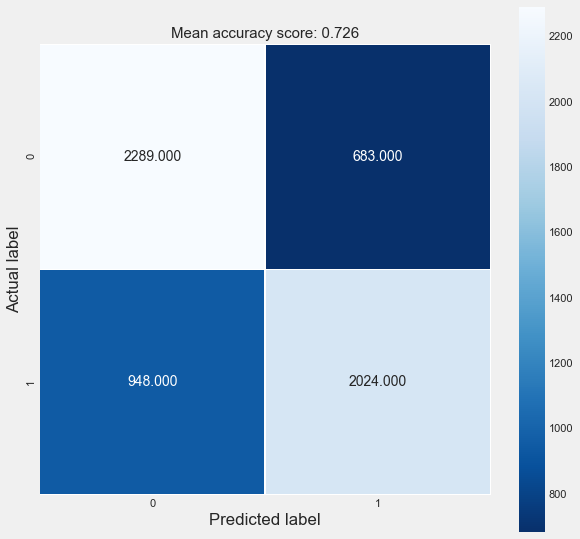

In [98]:
# Heat map for actual and predicted values using balanced RF model

cm = metrics.confusion_matrix(y_test2, predicted2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy2:.3}'
plt.title(all_sample_title, size = 15);

In [99]:
# Now using logistic regression to predict balanced classes

logreg = LogisticRegression()
logreg.fit(X_train2, y_train2.values.ravel())
predictions2 = logreg.predict(X_test2)
score = logreg.score(X_test2, y_test2)
print(score)

0.724764468371467


In [100]:
# Classification report for balanced logistic regression
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.72      0.74      0.73      2972
Severe Side-effects       0.73      0.71      0.72      2972

           accuracy                           0.72      5944
          macro avg       0.73      0.72      0.72      5944
       weighted avg       0.73      0.72      0.72      5944



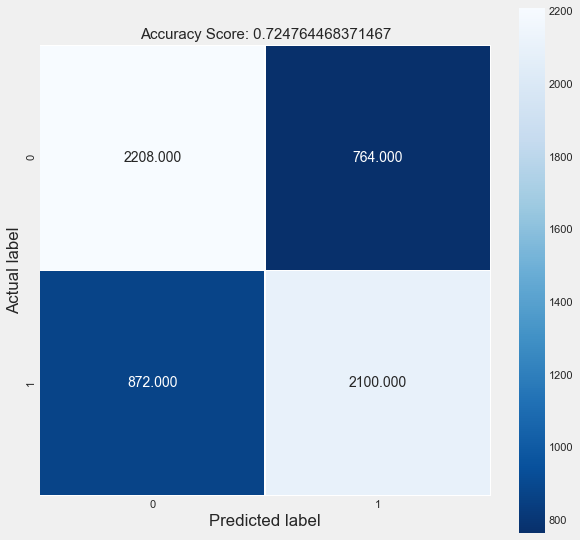

In [101]:
#Heat map for actual and predicted values for balanced logistic regression

cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

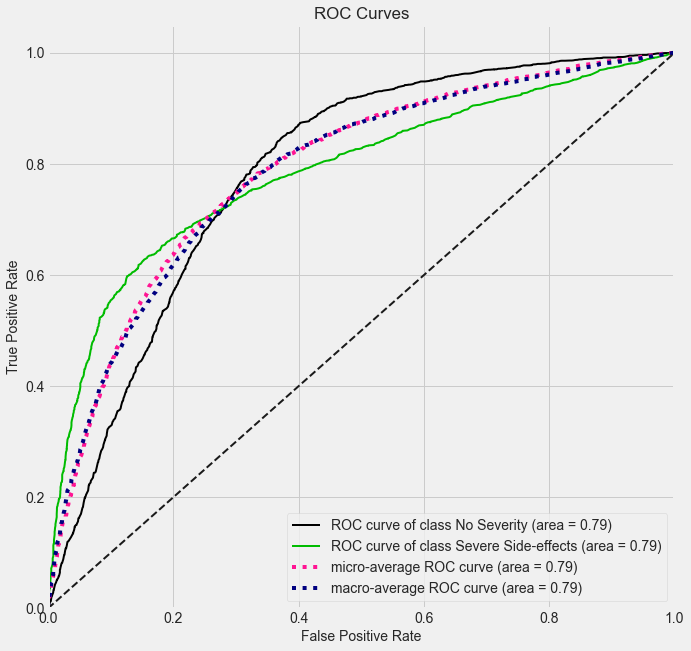

In [102]:
# ROC curve for balanced logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas22 = logreg.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas22)
plt.show()

In [103]:
# Using Gradient Boosting classifier to predict balanced classes

clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train2, y_train2.values.ravel())
predictions2 = clf.predict(X_test2)
score = clf.score(X_test2, y_test2)
print(score)

0.7446164199192463


In [104]:
# Classification report for balanced Gradient Boosting classifier
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.71      0.82      0.76      2972
Severe Side-effects       0.79      0.67      0.72      2972

           accuracy                           0.74      5944
          macro avg       0.75      0.74      0.74      5944
       weighted avg       0.75      0.74      0.74      5944



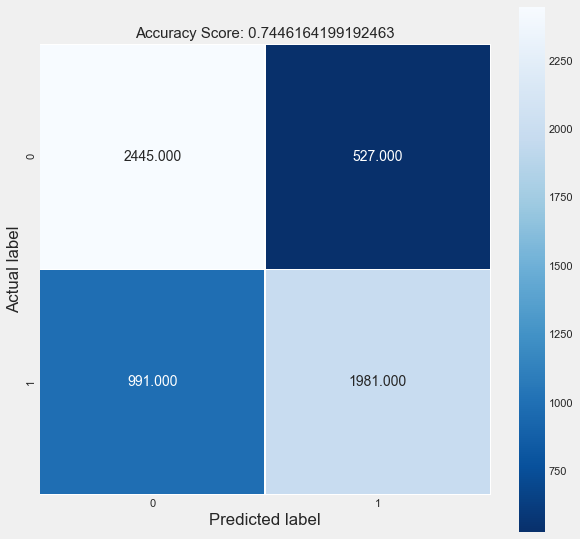

In [105]:
# Heat map for actual and predicted values for balanced Gradient Boosting classification

cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

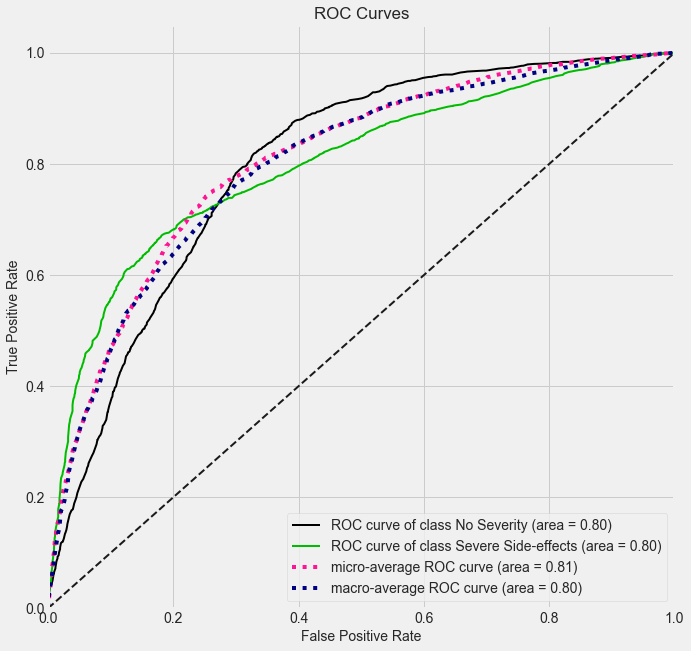

In [106]:
# ROC curve for balanced Gradient Boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas23 = clf.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, predicted_probas23)
plt.show()

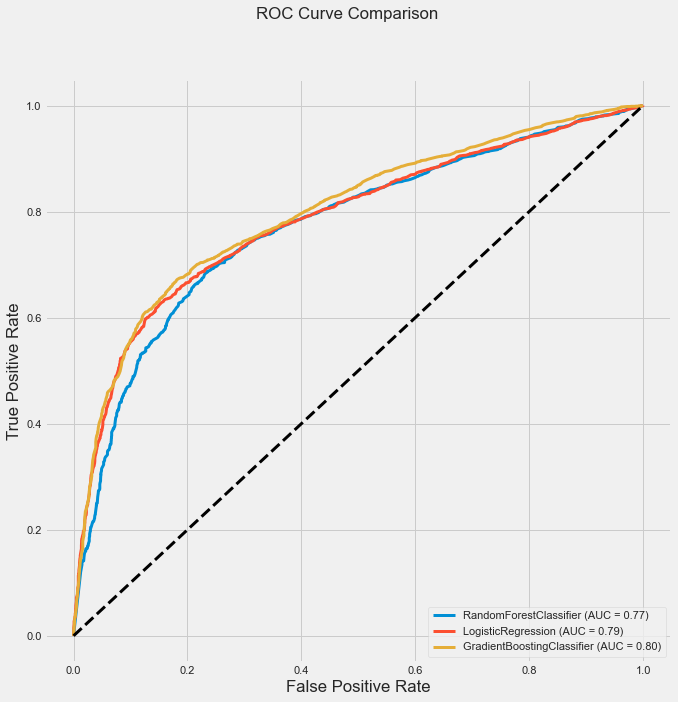

In [107]:
# Comparision of ROC curves after balancing the two classes

fig = plot_roc_curve( rf, X_test2, y_test2,lw=3)
fig = plot_roc_curve( logreg, X_test2, y_test2, ax = fig.ax_,lw=3)
fig = plot_roc_curve( clf, X_test2, y_test2, ax = fig.ax_,lw=3)
fig.figure_.suptitle("ROC Curve Comparison")
plt.plot([0,1],[0,1],'--',color='black',lw=3)
plt.show() 

### After balancing the two classes, all three models are more accurate in their ability to identify patients of "Severe side-effects". This is desirable for this particular analysis. Also we can see the GradientBoosting Classifier had the highest AUC of 0.80 which gives a good indication of how well a model can distinguish between classes.

# 7. Linear Regression Modeling

### Research Question: Is there a relationship between the number of days to show symptoms and the number of symptoms caused by the vaccines?
### Null Hypothesis: There is no relationship between 'numdays' and symptom count.
### Alternative Hypothesis: There is a relationship between 'numdays' and symptom count.

In [108]:
# Create a linear regression model. IV = 'numdays' DV = 'symptom_count'
# Can we predict symptom count based upon the number of days from vaccination to onset?

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

X_lin = covid_df2[['numdays']]
y_lin = covid_df2['symptom_count']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.20, random_state=0)
linreg.fit(X_train_lin,y_train_lin)
predicted_lin = linreg.predict(X_test_lin)
expected_lin = y_test_lin

In [109]:
# Evaluation of the Linear Regression Model
# The coefficient
print("Coefficients: \n", linreg.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(expected_lin, predicted_lin)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(expected_lin, predicted_lin))

Coefficients: 
 [-0.01809771]
Root mean squared error: 3.41
Coefficient of determination: -0.00045


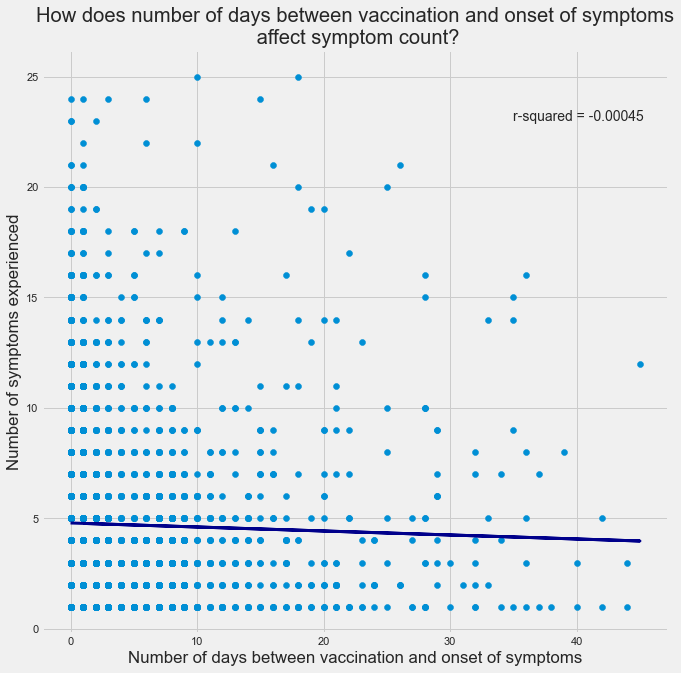

In [110]:
# Create a graph of numdays vs. symptom count + regression line of fit

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3)
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 23))
plt.show()

### There doesn't seem to be much of a linear relationship between the two variables. Let's try creating a regression model of degree 3 (cubic) and see if that does any better.

In [111]:
# Create a polynomial regression model based on degree=3

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_poly = np.array(covid_df2['numdays'].values)
y_poly = np.array(covid_df2['symptom_count'].values)

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_poly.reshape(-1,1),y_poly.reshape(-1,1))
poly_pred=pipe.predict(X_poly.reshape(-1,1))

# sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_poly,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

In [112]:
# Evaluation of the Polynomial (cubic) Regression Model

# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_poly, poly_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(y_poly, poly_pred))

Root mean squared error: 3.47
Coefficient of determination: -0.00261


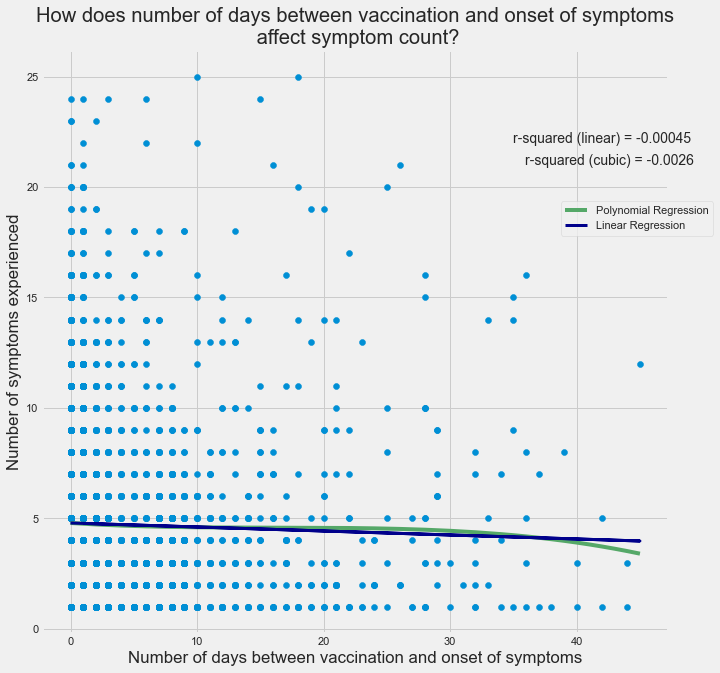

In [113]:
# Plotting predictions for linear and cubic fit regression

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3, label='Linear Regression')
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared (linear) = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 22))
plt.annotate("r-squared (cubic) = {:.4f}".format(metrics.r2_score(y_poly, poly_pred)), (35.9, 21))
plt.legend(loc='upper right', bbox_to_anchor=(1.08,.75))
plt.show()

### The cubic fit model still struggles to fit the data. This is likely due to the high concentration of data in the lower left quadrant of the above graph where 'numdays' and symptom count are less than 10.
### Let's test this relationship for significance via a correlation test. First we will test each variable for normality.

In [114]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means numdays is non-parametric

from scipy import stats
stats.normaltest(covid_df2['numdays'])

NormaltestResult(statistic=21296.971938060684, pvalue=0.0)

In [115]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means symptom_count is non-parametric

stats.normaltest(covid_df2['symptom_count'])

NormaltestResult(statistic=10260.897636006532, pvalue=0.0)

### Because our data is non-parametric, we need to use a spearman rank or kendall's correlation test to test our hypothesis.


In [116]:
print(stats.spearmanr(covid_df2['numdays'],covid_df2['symptom_count']))
print(stats.kendalltau(covid_df2['numdays'],covid_df2['symptom_count']))

SpearmanrResult(correlation=-0.02407431382474003, pvalue=3.798920506484018e-05)
KendalltauResult(correlation=-0.018973098419589215, pvalue=2.8124276366500103e-05)


### Note both tests claim evidence for a significant relationship between the two variables. Thus, we reject the null the hypothesis and say there is a significant relationship between 'numdays' and symptom count. This relationship is a very weak inverse relationship given the correlation coefficient. As 'numdays' increases, symptom count decreases  (ever so slightly).

# 8. Nonparametric Statistical Tests

### Research Question:  Is there a significant difference in age between patients who experienced no severe effects and patients who did experience severe side-effects?
### Null Hypothesis: There is no difference in age between patients who experienced no severe side-effects and patients who experienced severe side-effects.
### Alternative Hypothesis: There is a significant difference in age between patients who experienced no severe side-effects and patients who experienced severe side-effects.

In [117]:
covid_age_sev = covid_df2[['age_yrs','sex','severity','severity_type']]

In [118]:
covid_age_sev.head()

,age_yrs,sex,severity,severity_type
0,33.0,F,0,No Severity
1,73.0,F,0,No Severity
2,23.0,F,0,No Severity
3,58.0,F,0,No Severity
4,47.0,F,0,No Severity


In [119]:
# Split the dataframe into two groups: No severity and severity. Subset just the age variable

No_Severity_age = covid_age_sev[covid_age_sev['severity'] == 0]['age_yrs']
Severity_age = covid_age_sev[covid_age_sev['severity'] == 1]['age_yrs']

In [120]:
# Normality test for no severity age
# P-value is significant so no-severity_age is non-gaussian
stats.normaltest(No_Severity_age)

NormaltestResult(statistic=737.0026831441871, pvalue=9.160111947441657e-161)

In [121]:
# P-value is significant so severity age is non-gaussian
stats.normaltest(Severity_age)

NormaltestResult(statistic=450.82866193775004, pvalue=1.2699888800188004e-98)

### Both groups age distributions are non-Gaussian so we will use a Mann-Whitney U test to find any difference in age between the two groups.

In [122]:
# Conduct mann whitney test to test for significant difference between the two groups
stats.mannwhitneyu(No_Severity_age,Severity_age)

MannwhitneyuResult(statistic=32459234.0, pvalue=0.0)

In [123]:
No_Severity_age.describe()

count    23329.000000
mean        47.431866
std         16.040632
min          0.000000
25%         35.000000
50%         46.000000
75%         58.000000
max        115.000000
Name: age_yrs, dtype: float64

In [124]:
Severity_age.describe()

count    5944.000000
mean       65.932705
std        19.470628
min         1.000000
25%        52.000000
50%        70.000000
75%        81.000000
max       106.000000
Name: age_yrs, dtype: float64

### Per the Mann-Whitney U test, there is a significant difference in age between those who did not experience severe side-effects and those who did. From the descriptive statistics above, we see the average age of the 'No Severity' group is much lower than that of the 'Severity' group.
### Let's try to visualize this difference in age.

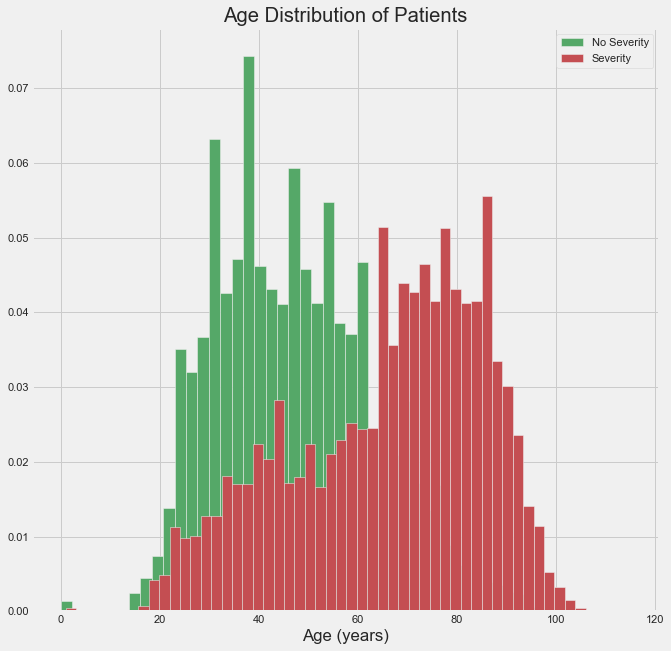

In [125]:
# Age distribution visual grouped by no severity and severity

plt.hist(No_Severity_age, bins=50, weights = np.array(len(No_Severity_age)*[1.0])/len(No_Severity_age),color='g', label = 'No Severity')
plt.hist(Severity_age, bins=50, weights = np.array(len(Severity_age)*[1.0])/len(Severity_age),color='r', label = 'Severity')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

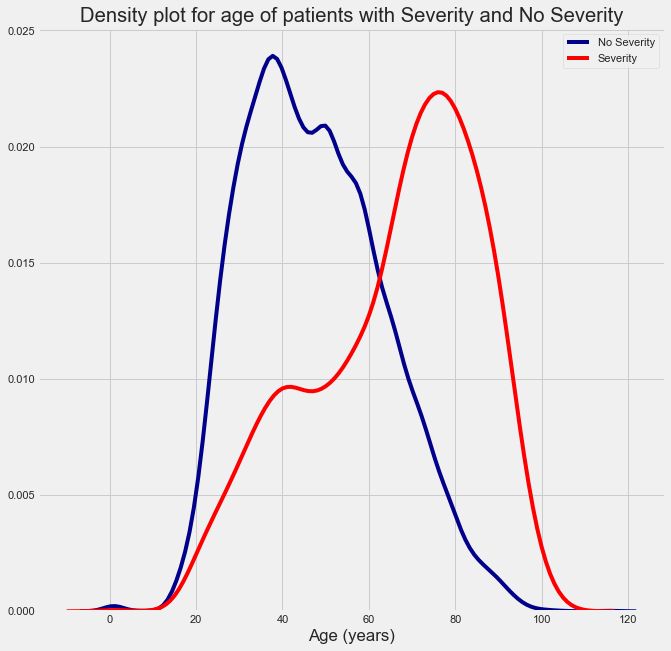

In [126]:
# Density plot of age split by no severity and severity groups

sns.distplot(No_Severity_age, hist=False, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},label = 'No Severity')
sns.distplot(Severity_age, hist=False, kde=True, bins=50, color = 'red', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}, label = 'Severity')
plt.xlabel('Age (years)')
plt.legend()
plt.title('Density plot for age of patients with Severity and No Severity')
plt.show()

# 9. Conclusion

### RQ1 - After balancing the two classes, GradientBoosting classifier was most accurately able to classify whether a patient may experience severe side-effects or not based on age, gender, vaccine manufacturer and medical history.
### RQ2 - There is a very weak, inverse relationship between number of days from vaccination to onset and symptom count. As 'numdays' increases, symptom count decreases very slightly.
### RQ3 - There is a significant difference in age of patients between those who experienced severe side-effects and those who did not.